# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

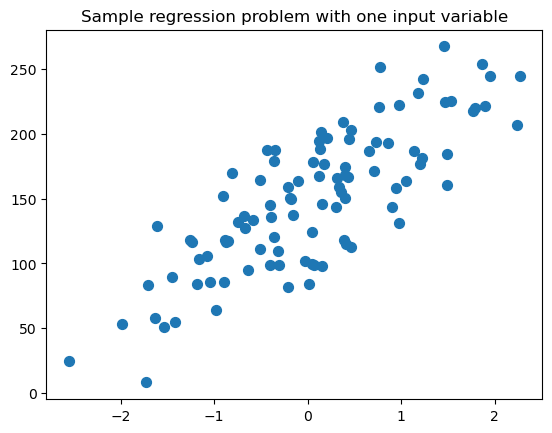

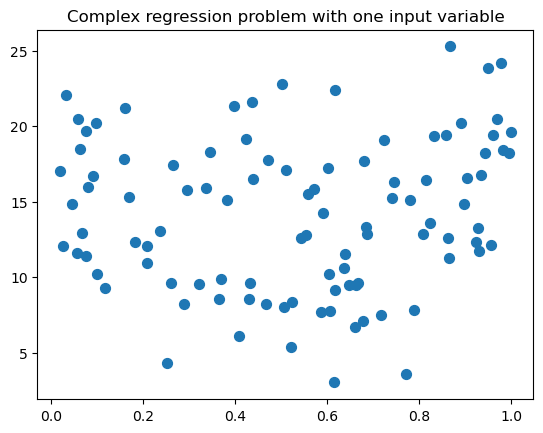

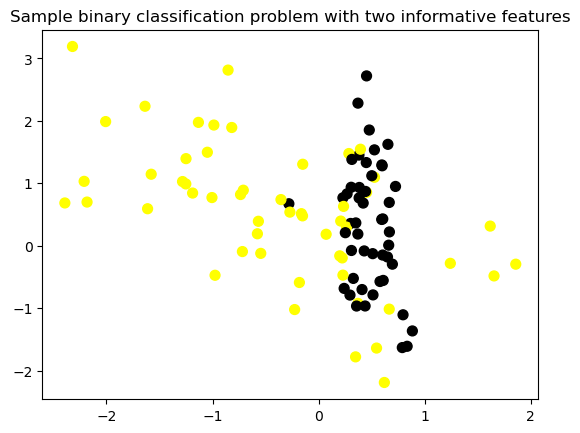

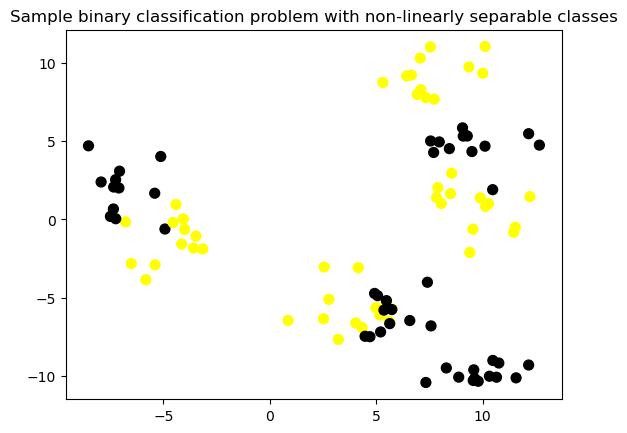

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('../datasets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(
    n_samples = 100, 
    n_features=1,
    n_informative=1,
    bias = 150.0,
    noise = 30, 
    random_state=0
)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(
    n_samples = 100, 
    n_features=2,
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    flip_y = 0.1,
    class_sep = 0.5, 
    random_state=0
)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

---
## Naive Bayes classifiers

* Naive Bayes classifiers are called naive because informally, **they make the simplifying assumption that each feature of an instance is independent of all the others given the class**. 
* In practice, of course, this is not often the case, features often are somewhat correlated. 
* This naive simplifying assumption means on the one hand, that **learning a Naive Bayes classifier is very fast**. Because only simple per class statistics need to be estimated for each feature and applied for each feature independently. 
* On the other hand, the penalty for this efficiency is that the **generalization performance of Naive Bayes Classifiers can often be a bit worse than other more sophisticated methods**, or even linear models for classification. 

### Naive Bayes classifiers Types
* ##### **Bernoulli**: binary features
* ##### **Multinomial**: discrete features
* ##### **Gaussian**: continuous/real valued features
    * Typically, Gaussian Naive Bayes is used for high-dimensional data. When each data instance has hundreds, thousands or maybe even more features. And likewise the Bernoulli and Multinomial flavors of Naive Bayes are used for text classification where there are very large number of distinct words is features and where the future vectors are sparse because any given document uses only a small fraction of the overall vocabulary. 

### Naive Bayes classifiers Pros and Cons
* ##### Pros:
    * Easy to understand.
    * Simple, efficient parameter estimation.
    * Works well with high dimensional data.
    * Often useful as a baseline comparison against more sophisticated methods.

* ##### Cons:
    * Assumption that features are conditionally independent given the class is not realistic.
    * As a result, other classifier types often have better generalization performance.
    * Their confidence estimates for predictions are not very accurate.

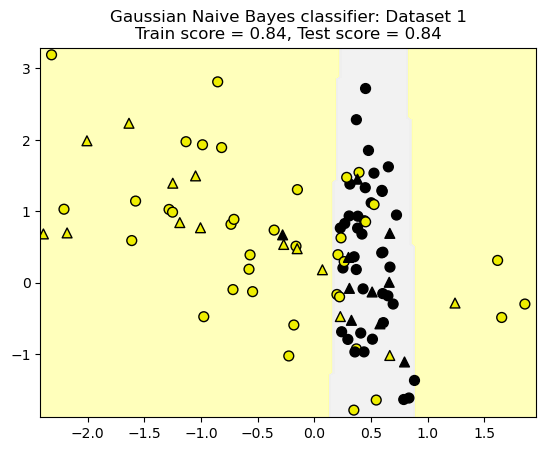

In [2]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: Dataset 1')

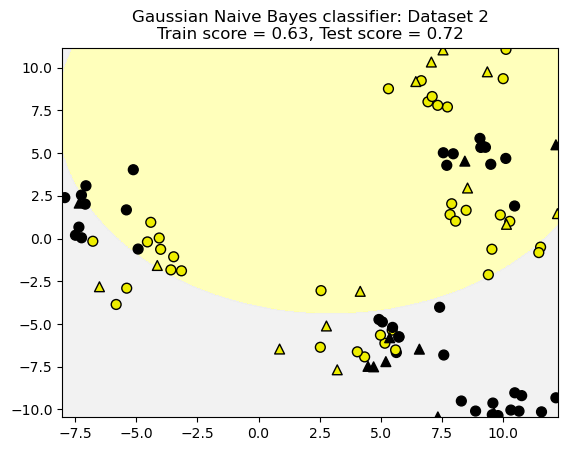

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


---
## Ensembles of Decision Trees

An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. 

With different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. 

### Random forests

* An ensemble of trees, not just one tree.
* One decision tree -> Prone to overfitting.
* Many decision trees -> More stable, better generalization.
* Ensemble of trees should be diverse -> introduce random variation into tree-building:
    * The data used to build each tree is selected randomly.
    * The features chosen in each split tests are randomly selected.


Each tree were built from a different random sample of the data called the bootstrap sample. Bootstrap samples are commonly used in statistics and machine learning. If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement. 


When picking the best split for a node, instead of finding the best split across all possible features, a random subset of features is chosen and the best split is found within that smaller subset of features. The number of features in the subset that are randomly considered at each stage is controlled by the max_features parameter. This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different. The random forest model is quite sensitive to the max_features parameter. 

#### Random Forest Pros and Cons
* ##### Pros:
    * Widely used, excellent prediction performance on many problems.
    * Doesn't require careful normalization of features or extensive parameter tunning.
    * Like decision trees, handles a mixture of feature types.
    * Easily parallelized across multiple CPUs.
* ##### Cons:
    * The resulting models are often difficult for humans to interpret.
    * Like decision trees, random forests may not be a good choice for very high-dimensional tasks (e.g. text classifiers) compared to fast, accurate linear models.

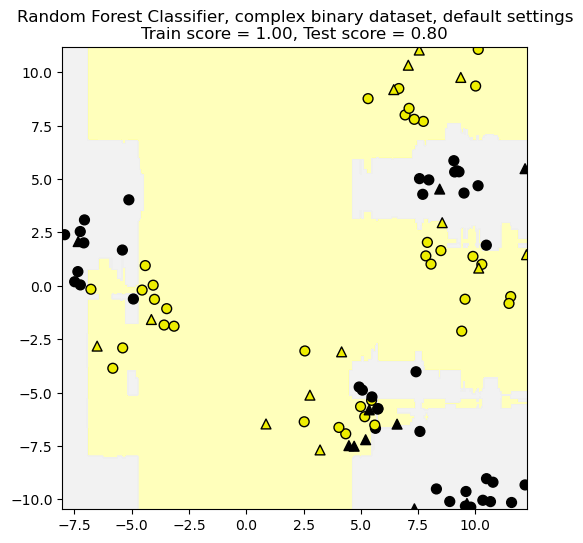

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

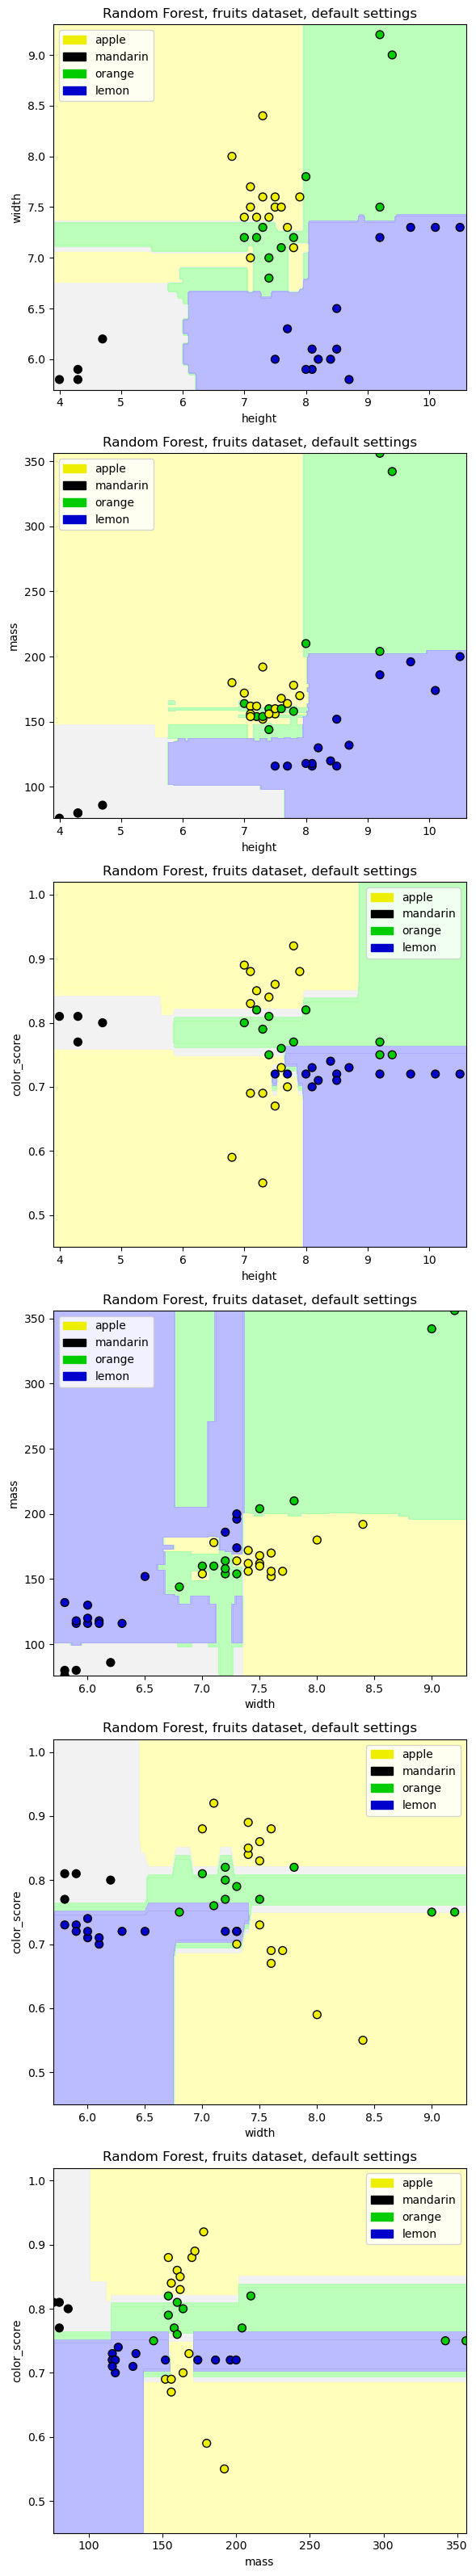

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruits.values, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]] # pair of features

for pair, axis in zip(pair_list, subaxes):
     X = X_train[:, pair]
     y = y_train

     clf = RandomForestClassifier().fit(X, y)
     plot_class_regions_for_classifier_subplot(clf, X, y, None, None, title, axis, target_names_fruits)

     axis.set_xlabel(feature_names_fruits[pair[0]])
     axis.set_ylabel(feature_names_fruits[pair[1]])

plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10, random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [7]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features=8, random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


### Gradient-boosted decision trees

Unlike the random forest method that builds and  combines a forest of randomly different trees in parallel, the key idea of gradient boosted decision trees is that they build a series of trees. Where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series. 

Typically, gradient boosted tree ensembles use lots of shallow trees known in machine learning as weak learners. Built in a nonrandom way, to create a model that makes fewer and fewer mistakes as more trees are added. 

#### GBDT Pros and Cons
* ##### Pros:
    * Often best off-the-shelf accuracy on many problems.
    * Using model for prediction requires only modest memory ans is fast.
    * Doesn't require careful normalization of features to perform well.
    * Like decision trees, handles a mixture of feature types.

* ##### Cons:
    * Like random forests, the models are often difficult for humans to interpret.
    * Requires careful tuning to learning rate and other parameters.
    * Training can require significant computation.
    * Like decision trees, not recommended for text classification and other problems with very high dimensional sparse features, for accuracy and computational cost reasons.

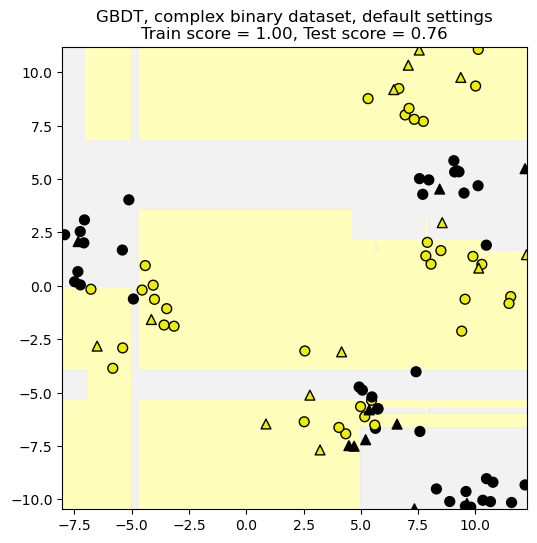

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

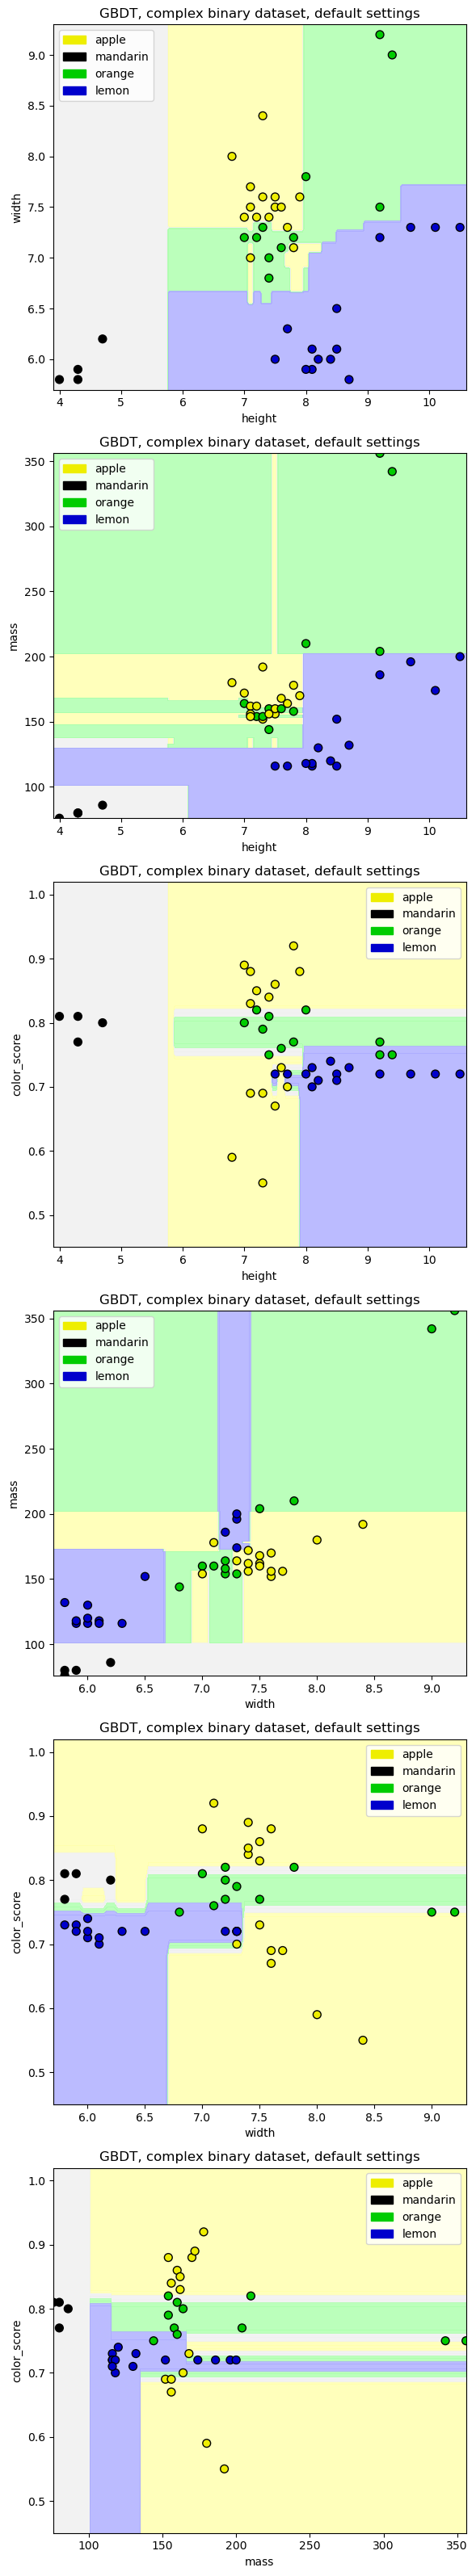

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,  y_fruits.values, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
     X = X_train[:, pair]
     y = y_train

     clf = GradientBoostingClassifier().fit(X, y)
     plot_class_regions_for_classifier_subplot(clf, X, y, None,  None, title, axis, target_names_fruits)

     axis.set_xlabel(feature_names_fruits[pair[0]])
     axis.set_ylabel(feature_names_fruits[pair[1]])

plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


---
## Neural networks

### Neural Networks Pros and Cons
* ##### Pros:
    * They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.

* ##### Cons:
    * Larger, more complex models require significant training time, data and customization.
    * Careful preprocessing of the data is needed.
    * A good choice when the features of similar types, but less so when features of different types.

#### Activation functions

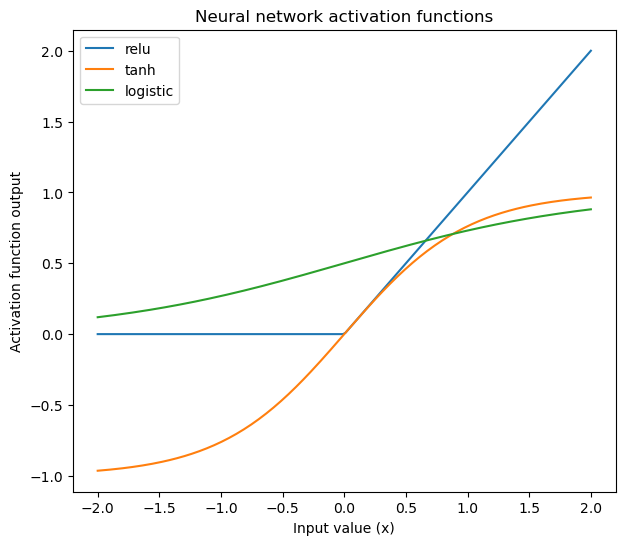

In [11]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


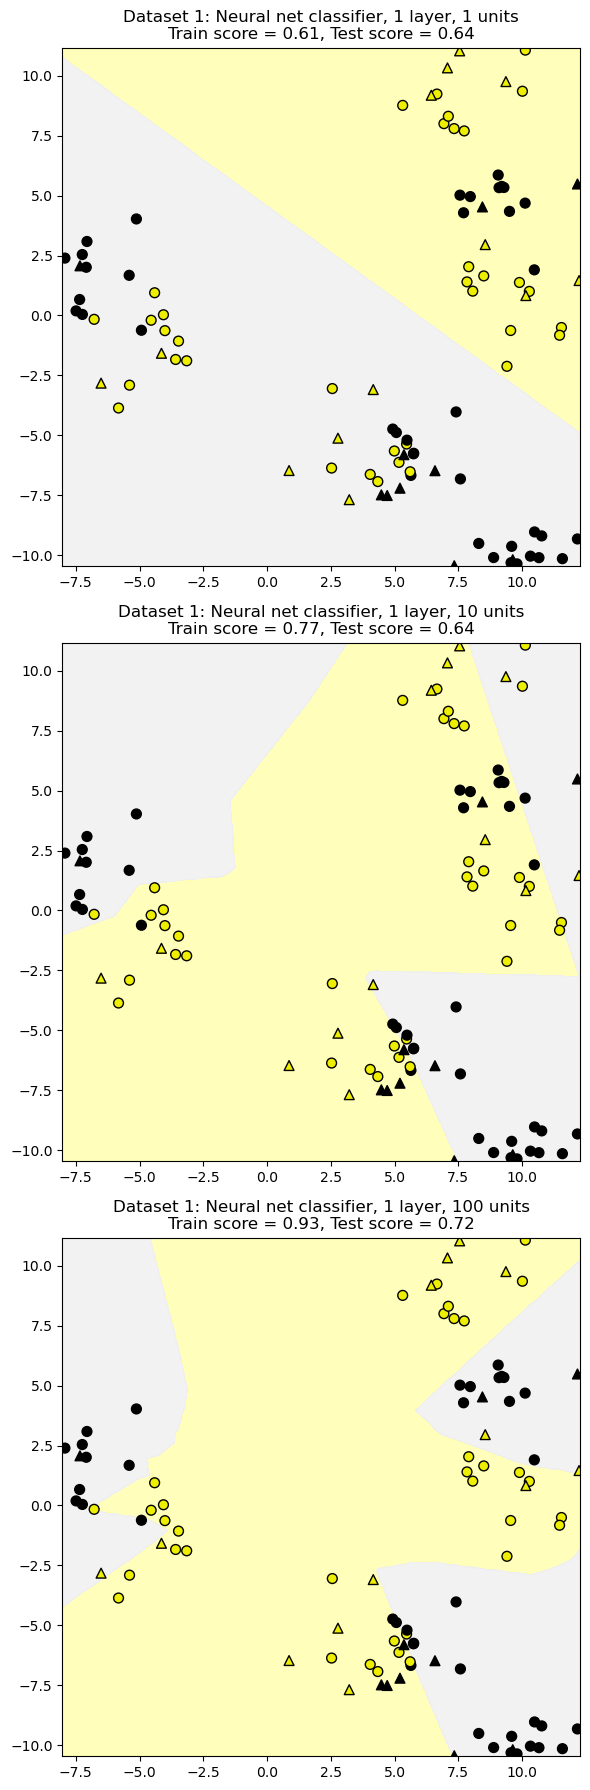

In [12]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs', random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

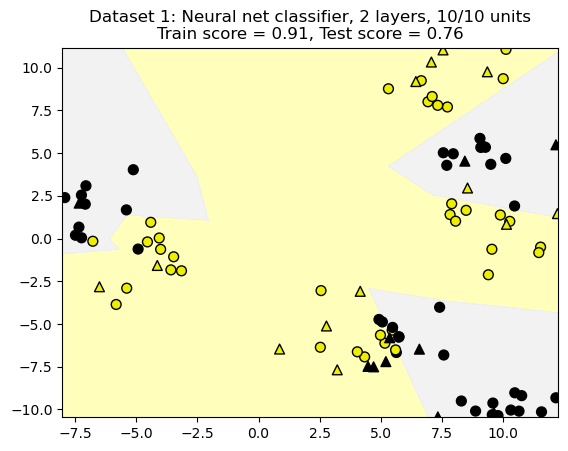

In [13]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs', random_state = 0).fit(X_train, y_train)
plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/s

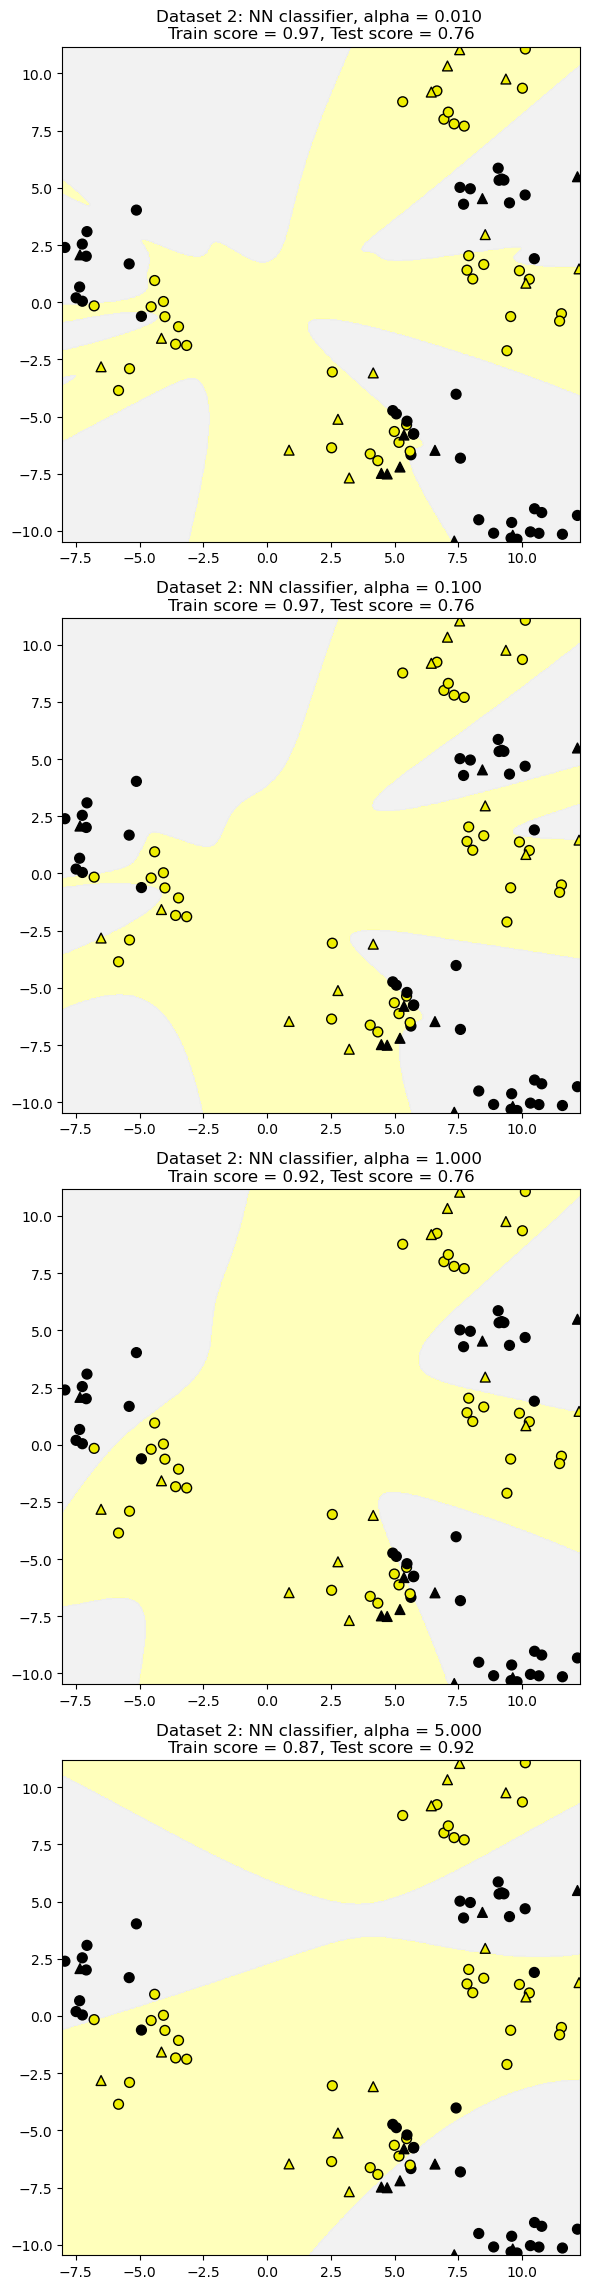

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(
        solver='lbfgs', 
        activation = 'tanh',
        alpha = this_alpha,
        hidden_layer_sizes = [100, 100],
        random_state = 0
    ).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/s

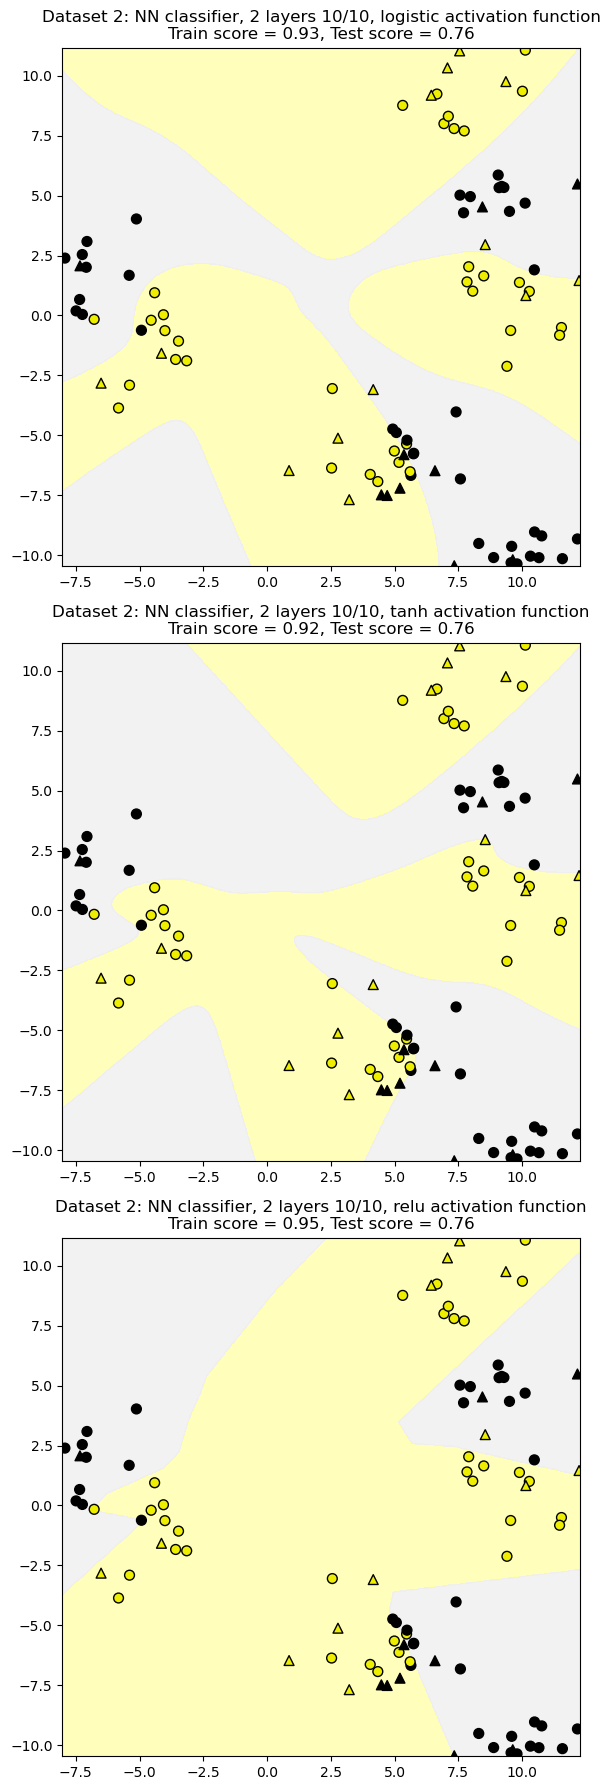

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(
        solver='lbfgs', 
        activation = this_activation,
        alpha = 0.1, 
        hidden_layer_sizes = [10, 10],
        random_state = 0
    ).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

#### Application to real-world dataset for classification

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=[100, 100], alpha=5.0, random_state=0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


### Neural networks: Regression

/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/user/.application-data/miniconda3/envs/ml-tensorflow/lib/python3.9/site-packages/s

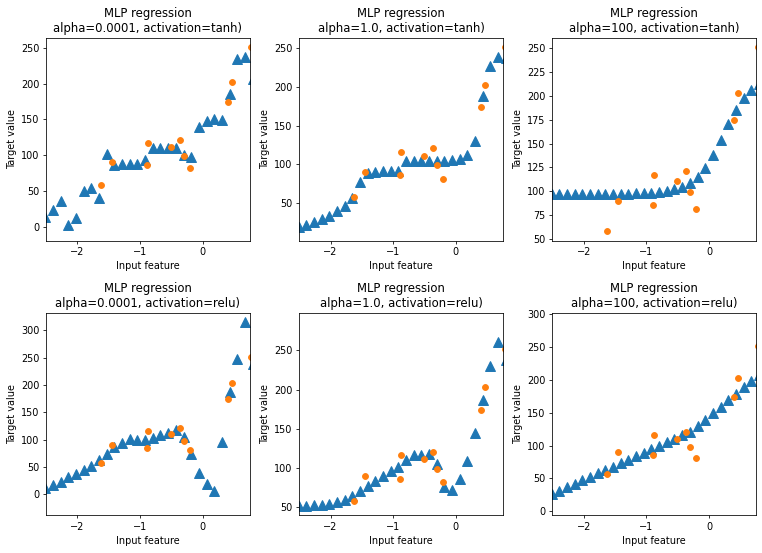

In [17]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(
            hidden_layer_sizes = [100, 100],
            activation = thisactivation,
            alpha = thisalpha,
            solver = 'lbfgs'
        ).fit(X_train, y_train)

        y_predict_output = mlpreg.predict(X_predict_input)
        
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'.format(thisalpha, thisactivation))
        plt.tight_layout()

---
## Deep Learning

#### Depp Learning Pros and Cons
* ##### Pros:
    * Powerful: Deep learning has achieved significant gains over the machine learning approaches on many difficult learning tasks, leading to state-of-the-art performance across many different domains.
    * Does effective automatic feature extraction, reducing the need for guesswork and heuristics on this key problem.
    * Current software provides flexible architectures that can be adapted for new domains fairly easy.
* ##### Cons:
    * Can require huge amounts of training data.
    * Can require huge amounts of computing power.
    * Architecture can be complex and often must be highly tailored to a specific application.
    * The resulting models may not be easily interpretable.

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Data preparation

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels)

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255
test_labels = to_categorical(test_labels)

# Model definition

network = models.Sequential()
network.add(layers.Input(shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

data = network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Model evaluation

test_loss, test_acc = network.evaluate(test_images, test_labels)

print(f'\ntest loss: {test_loss}')
print(f'test accuracy: {test_acc}')

2023-12-23 11:31:40.368759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-23 11:31:49.034027: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-23 11:31:49.040465: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-23 11:31:49.085099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-23 11:31:49.086380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce 940MX computeCapability: 5.0
coreClock: 1.2415GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 13.41GiB/s
2023-12-23 11:31:49.086550: I tensorflow/stream_executor/platform/defaul

Epoch 1/5


2023-12-23 11:32:00.666488: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


469/469 [==============================] - 8s 12ms/step - loss: 0.4597 - accuracy: 0.8744
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1183 - accuracy: 0.9657
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0720 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0503 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0695 - accuracy: 0.9784

test loss: 0.06950271874666214
test accuracy: 0.9783999919891357


---
# Data Leakage

When data used to train contains information about what is being predicted. Introducing information about the target during training that would not legitimately be available during actual use.

### Obvious Examples:
* Including the label to be predicted as a feature.
* Including test data with training data.

If the model performance is too good to be true, it probably is and likely due to "giveaway" features

### More Subtle Examples of Data Leakage
* Prediction target: will a user stay on a site or leave?
    * Giveaway feature: total session length, based information about **future** page visit.
* Predicting if a user on a financial site is likely to open an account.
    * An account number field that's only filled once the user does open the account.
* Diagnostic test to predict a medical condition.
    * The existing patient dataset contains a binary variable that happens to mark whether they had surgery for that condition
    * Combinations of missing diagnosis codes that are not available while the patient's condition was still being studied.
    * The patient ID could contain information about specific diagnosis paths (e.g. for routine visits vs specialists)
    
Any of these leaked features is highly predictive of the target, but not legitimately available at the time prediction needs to be done. 

### Other Examples of Data Leakage
* ##### Leakage in training data
    * Performing data preprocessing using parameters or results from analyzing the entire dataset: Normalizing and rescaling, detecting and removing outliers, estimating missing values, feature selection.
    * Time-series datasets: using records from the future when computing features for the current prediction.
    * Errors in data values/gathering or missing variable indicators (e.g. the special value 999) can encode information about missing data that reveals information about the future.
* ##### Leakage in features
    * Removing variables that are not legitimate without also removing variables that encode the same or related information (e.g. diagnosis info may still exist in patient ID).
    * Reversing of intentional randomization or anonymization that reveals specific information about (e.g. users not legitimately available in actual use).

Any of the above could be present in any external data joined to the training set.

### Detecting Data Leakage
* ##### Before building the model
    * Exploratory data analysis to find surprises in the data.
    * Are the features very high correlated to the target value?
* ##### After building the model
    * Look for surprising feature behavior in the fitted model.
    * Are there features with very high weights, ore high information gain?
    * Simple rule-based models like decision trees can help with features like account numbers and patient IDs.
    * Is overall model performance surprisingly good compared to known results on the same dataset, or for similar problems on similar datasets?
* ##### Limited real-world deployment of the trained model
    * Potentially expensive in terms of development time, but more realistic.
    * Is the trained model generalizing well to new data? 

#### Minimizing Data Leakage
* ##### Perform data preparation within each cross-validation fold separately
    * Scale/normalize data, perform feature selection, etc. within each fold separately, not using the entire dataset.
    * For any such parameters estimated on the training data, you must use those same parameters to prepare data on the corresponding held-out test.
* ##### With time series data, use a timestamp cutoff
    * The cutoff value is set to specific time point where prediction is to occur using current and past records.
    * Using a cutoff time will make sure you aren't accessing any data records that were gathered after the prediction time o.e. in the future.
* ##### Before any work with a new dataset, split off a final test validation dataset
    * ...if you have enough data.
    * Use this final test dataset as the very last step in your validation.
    * Helps to check the true generalization performance of any trained models.